# CLUSTERING ANALYSIS :

Assignment Overview:
Goal: Apply and compare K-Means and Hierarchical Clustering on a dataset using Python.

# Step 1: Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers_Large.csv")  # Upload this file to Colab first

In [66]:
# dataset total
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,68,86
1,2,Female,56,22,57
2,3,Male,66,41,29
3,4,Male,69,41,78
4,5,Male,49,112,92
...,...,...,...,...,...
195,196,Female,47,90,61
196,197,Female,55,40,39
197,198,Female,55,30,1
198,199,Male,62,65,3


In [61]:
# first five rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,0,49,68,86,3,0
1,1,56,22,57,1,1
2,0,66,41,29,3,3
3,0,69,41,78,3,0
4,0,49,112,92,4,0


In [60]:
# last five rows
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
195,1,47,90,61,1,1
196,1,55,40,39,1,1
197,1,55,30,1,1,1
198,0,62,65,3,3,3
199,0,68,115,77,3,0


In [59]:
# dataset table total information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   KMeans_Cluster          200 non-null    int32
 5   Hierarchical_Cluster    200 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


In [58]:
# we can see the statistics summary
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,44.405000,77.035000,49.800000,1.850000,1.905000
std,0.501255,15.353816,36.558397,29.454846,1.259137,1.394885
min,0.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,32.750000,44.000000,23.750000,1.000000,1.000000
50%,0.500000,46.000000,74.000000,48.500000,2.000000,2.000000
75%,1.000000,56.000000,111.000000,75.250000,3.000000,3.000000
max,1.000000,69.000000,139.000000,99.000000,4.000000,4.000000


# Step 2: Preprocess the Data

In [19]:
# Drop CustomerID (non-useful)
df.drop("CustomerID", axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Encode Gender if necessary
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.0,0.300025,-0.247759,1.232084
1,1.0,0.757082,-1.509177,0.245055
2,-1.0,1.410020,-0.988157,-0.707938
3,-1.0,1.605902,-0.988157,0.959800
4,-1.0,0.300025,0.958815,1.436297


#  Step 3: Exploratory Data Analysis (EDA)

**pair-plot**

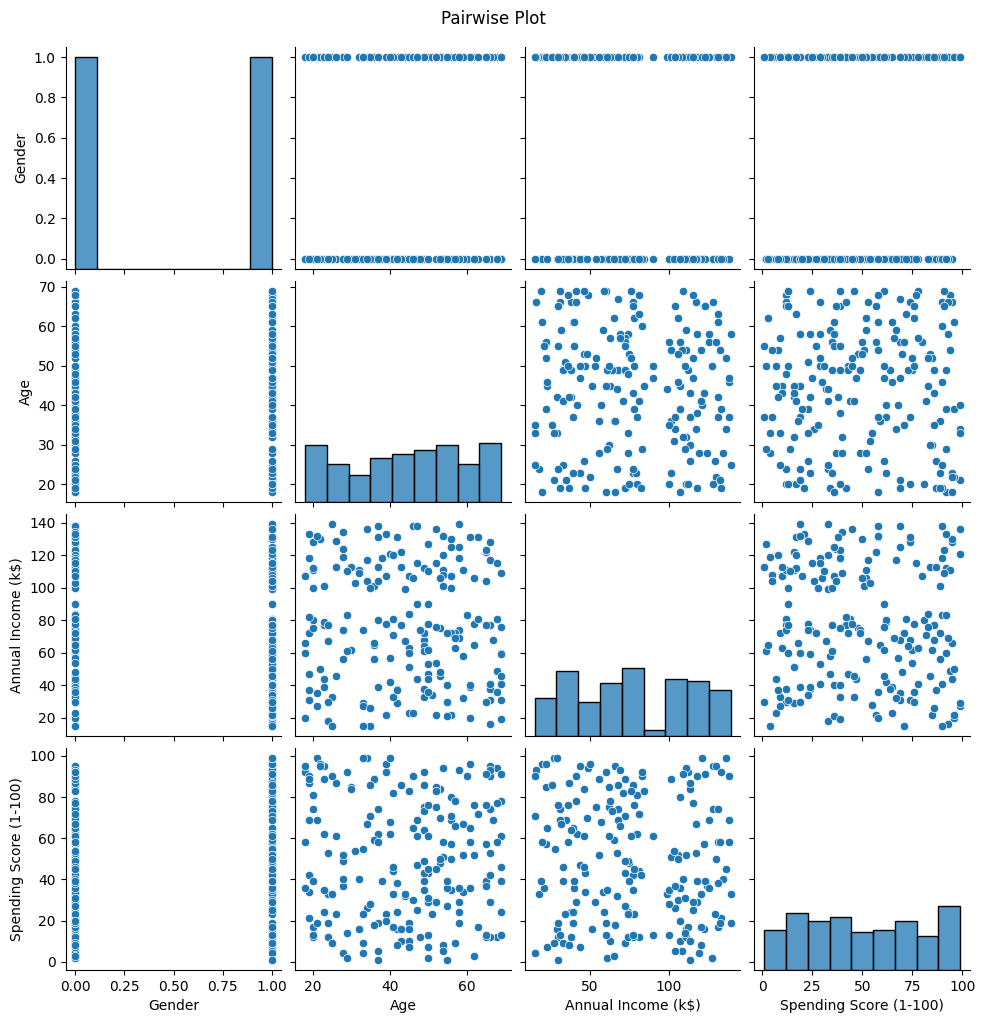

In [23]:
sns.pairplot(df)
plt.suptitle("Pairwise Plot", y=1.02)
plt.show()

**Heat-map**

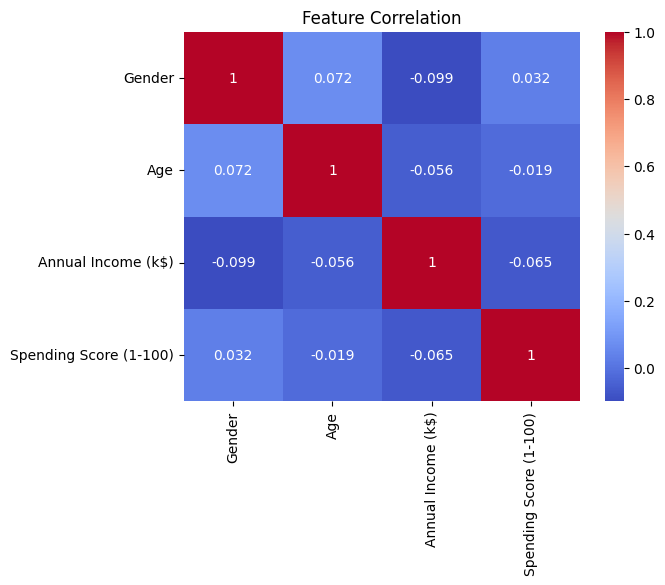

In [25]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

**Elbow-Method**

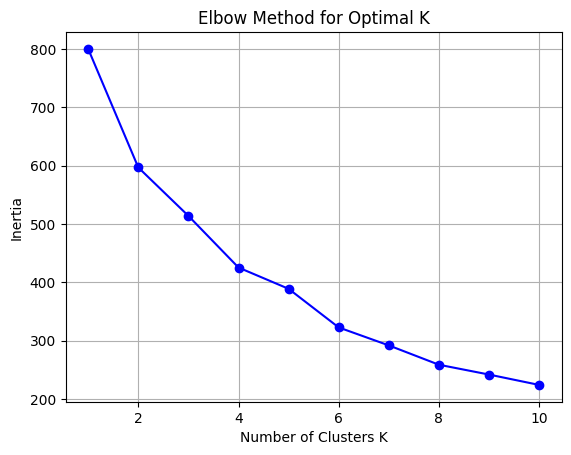

In [29]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# KMeans-cluster Techniques

In [31]:
# apply KMeans with K=5

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

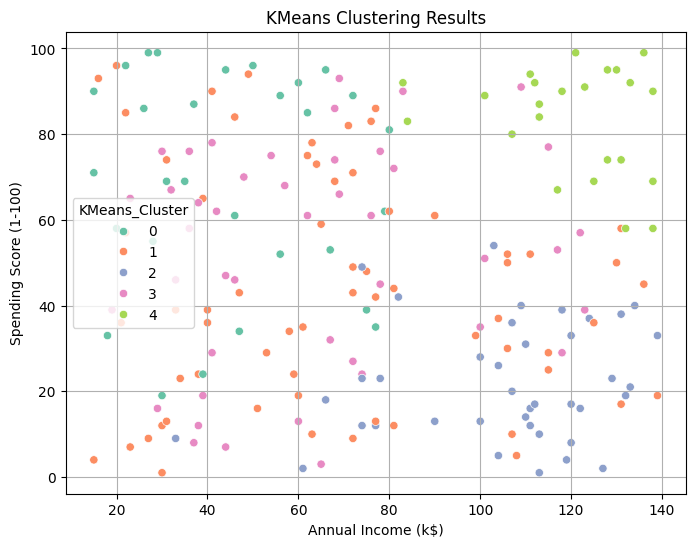

In [33]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Set2')
plt.title("KMeans Clustering Results")
plt.grid(True)
plt.show()

# Step 5: Hierarchical **Clustering**

**Dendrogram**

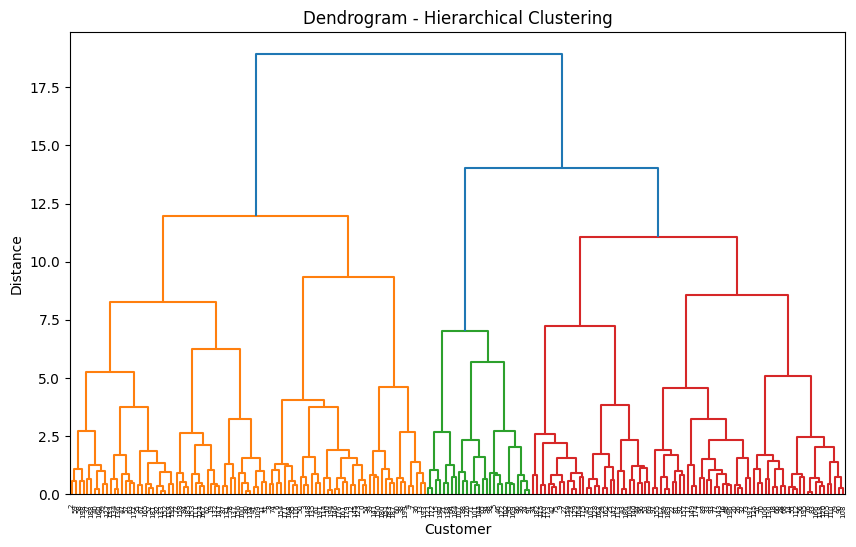

In [43]:
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(scaled_df, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Customer")
plt.ylabel("Distance")
plt.show()

**Agglomerative Clustering**

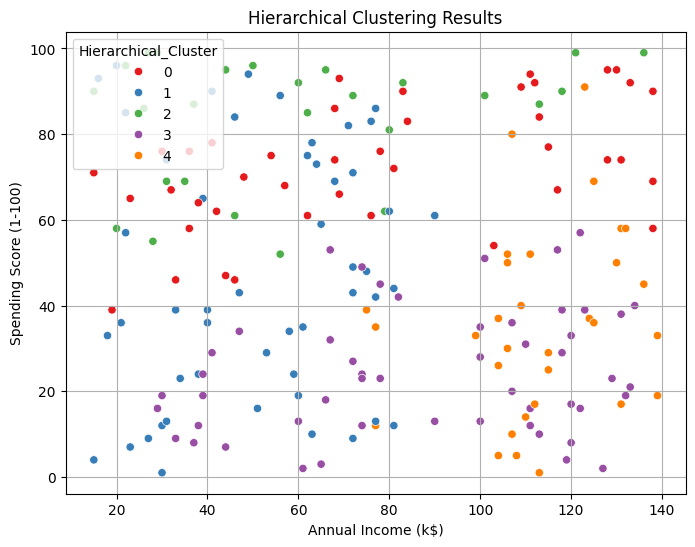

In [51]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = agglo.fit_predict(scaled_df)

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='Set1')
plt.title("Hierarchical Clustering Results")
plt.grid(True)
plt.show()

# Step 6: Cluster Analysis & Interpretation

In [53]:
# Analyze cluster means
print("KMeans Cluster Centers (in scaled space):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-2]))

KMeans Cluster Centers (in scaled space):
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  0.172414 -1.282787           -0.874686                0.667565
1  1.000000  0.600989           -0.242617               -0.206978
2 -0.538462 -0.736305            0.764048               -0.947931
3 -1.000000  0.774889           -0.378637                0.071010
4 -0.166667 -0.276737            1.156483                1.155504


In [54]:
# View summary stats per cluster
kmeans_summary = df.groupby('KMeans_Cluster').mean()
print("\nKMeans Cluster Summary:")
print(kmeans_summary)

agglo_summary = df.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Summary:")
print(agglo_summary)


KMeans Cluster Summary:
                  Gender        Age  Annual Income (k$)  \
KMeans_Cluster                                            
0               0.586207  24.758621           45.137931   
1               1.000000  53.609375           68.187500   
2               0.230769  33.128205          104.897436   
3               0.000000  56.272727           63.227273   
4               0.416667  40.166667          119.208333   

                Spending Score (1-100)  Hierarchical_Cluster  
KMeans_Cluster                                                
0                            69.413793              2.137931  
1                            43.718750              1.750000  
2                            21.948718              3.153846  
3                            51.886364              1.227273  
4                            83.750000              1.250000  

Hierarchical Cluster Summary:
                        Gender        Age  Annual Income (k$)  \
Hierarchical_Cluster    

# Comments & Insights

In [56]:
# - KMeans grouped customers into 5 distinct segments based on income and spending.
# - Hierarchical clustering gave similar but slightly different groupings.
# - Elbow method clearly suggested K=5 as optimal.
# - Cluster 4 in KMeans has high income & high spending → Target customers.
# - Hierarchical is useful when visualizing relationships via dendrograms.

# ASSIGNMENT COMPLETED